## Libraries

In [58]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2,os

## Load & Preprocess Image

In [49]:
def preprocess_image(img_path):
  """ Takes Image-path; resize(256) => convert to float => add dim(for batch) => normalize """
  try:
    img=plt.imread(img_path)                                                    # Load image 
    preprocessed_img=img.astype(np.float32)[np.newaxis,...]/255.        # Convert to numpy(float32) & add batch-dim & normalize
    resized_img=tf.image.resize(preprocessed_img,(256,256))                                  # Resize image(256,256)
  except:
    print("Image Not found !!!!")
  return resized_img

In [59]:
content_image_path='/content/download.jpg'
style_image_path="/content/starrynight.jfif"

content_image =preprocess_image(content_image_path)       # content image
style_image =preprocess_image(style_image_path)           # style image

## Visualize Images

In [53]:
print("Both Images arte of Same size: ",content_image.shape==style_image.shape)

Both Images arte of Same size:  True


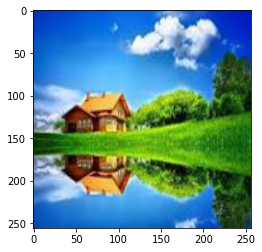

In [54]:
plt.imshow(np.squeeze(content_image))
plt.show()

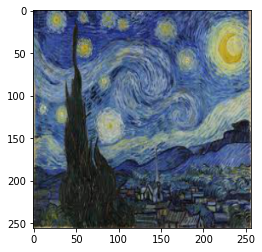

In [55]:
plt.imshow(np.squeeze(style_image))
plt.show()

## Load Style Transfer Model


In [57]:

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Perform Style transfer

In [70]:
def stylize_image(save_img=False):
  """ Performs Style Transfer """
  model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')    # Load Fast arbitrary image style transfer model  #https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2
  C=os.path.basename(content_image_path).split(".")[0]
  S=os.path.basename(style_image_path).split(".")[0]

  stylized_image=model(tf.constant(content_image),tf.constant(style_image))[0]               # Perform Style Transfer
  
  plt.imshow(cv2.hconcat([np.squeeze(content_image),np.squeeze(stylized_image),np.squeeze(style_image)]))            # visualize Concatenated Image
  plt.show() 

  #merged_image=

  if save_img==True:
    cv2.imwrite(S+'fied'+"_"+C+"_image.png",cv2.cvtColor(np.squeeze(stylized_image)*255,cv2.COLOR_BGR2RGB))
    print("Image saved @",os.getcwd())

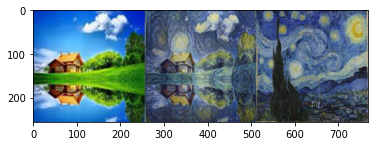

Image saved @ /content


In [71]:
stylize_image(save_img=True)